<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Index.ipynb" target="_self"> <h2> &uarr; Back to front page</h2></a>
    </div>
  </div>
</nav>

# Simple lowpass filtering of Audio

Digital filters are a major part of many digital signal processing systems. While there are a lot of advancet topics in regards to digital filters which we will explore later in the course, making use of a simple lowpass filter can be done quite easily.

All linear and time-invariant (LTI) digital systems will be comprised of three main operations:
- Multiplication of a signal sample $x[n]$ by some constant term.
- Adding together two signal samples $x_1[n]$ and $x_2[n]$.
- Delaying a sample by $N$ sample periods

We can combine these three operations to create an exponential averagin filter as shown in the figure below.

$$y[n] = (1-\alpha)\cdot x[n] + \alpha \cdot y[n] \tag{1}$$
Translated into python code, each output value `current_y` will be calculated by combining the current input value `current_x`, and the previous output value `previous_y` with individual weights determined by a filter coefficient `alpha`.

```Python
current_y = (1-alpha)*current_x + alpha*previous_y
previous_y = current_y
```

The line of code above can process *one sample*, and store the current output in the variable `previous_y`, so it can be used when filtering the next input sample. To filter an entire audio signal, we must iterate through the entire audio signal array, doing this operation with each sample in turn.

In [1]:
import scipy.io.wavfile as wavfile # Import module for handling of .wav audio files
from IPython.display import Audio  # Import the Audio object for use in audio playback
import numpy as np

fs, sampleData = wavfile.read("sample_audio.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements
xn = sampleData/max(abs(sampleData))               # Scale sample values to the range -1 < x[n] < 1

## a)

Use the filter in equation $1$ with $\alpha = 0.95$ to filter the audio signal from `sample_audio.wav`, and play the sound using your computer. What do you hear?

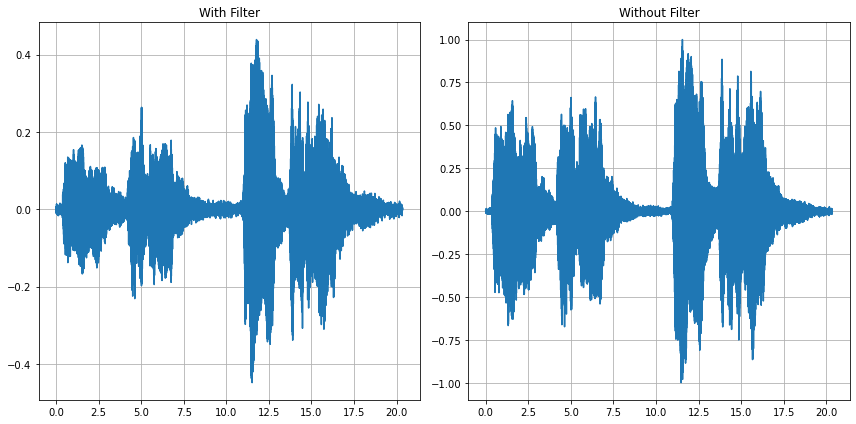

In [28]:
# WRITE YOUR CODE HERE:
import matplotlib.pyplot as plt

alfa = 0.95
prevY = 0
Y = []

for x in xn:
    y = (1-alfa)*x + alfa*prevY
    Y.append(y)
    prevY = y

Y = np.array(Y)
timeA = np.linspace(0,len(xn)/fs,len(xn))



plt.figure(figsize=(12,6)) # Create "blank" figue of specified size

plt.subplot(1,2,1)
plt.plot(timeA,Y)
plt.title("With Filter")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(timeA,xn)
plt.title("Without Filter")
plt.grid(True)
plt.tight_layout() # Make room for axis labels
    
    

In [29]:
Audio(np.int16(Y*0x7FFF), rate=fs) #With filter

In [10]:
Audio(np.int16(xn*0x7FFF), rate=fs) #Without filter

ANSWER THEORY QUESTIONS HERE:

It sounds like the filtered version is damped. Like something is blocking the speaker, damping the noise. 


## b)
Create a plot showing the frequency content of the audio signal around $t= 12.3\text{ s}$ before and after filtering. What is the difference between the two plots, and what does the filter appear to be doing?

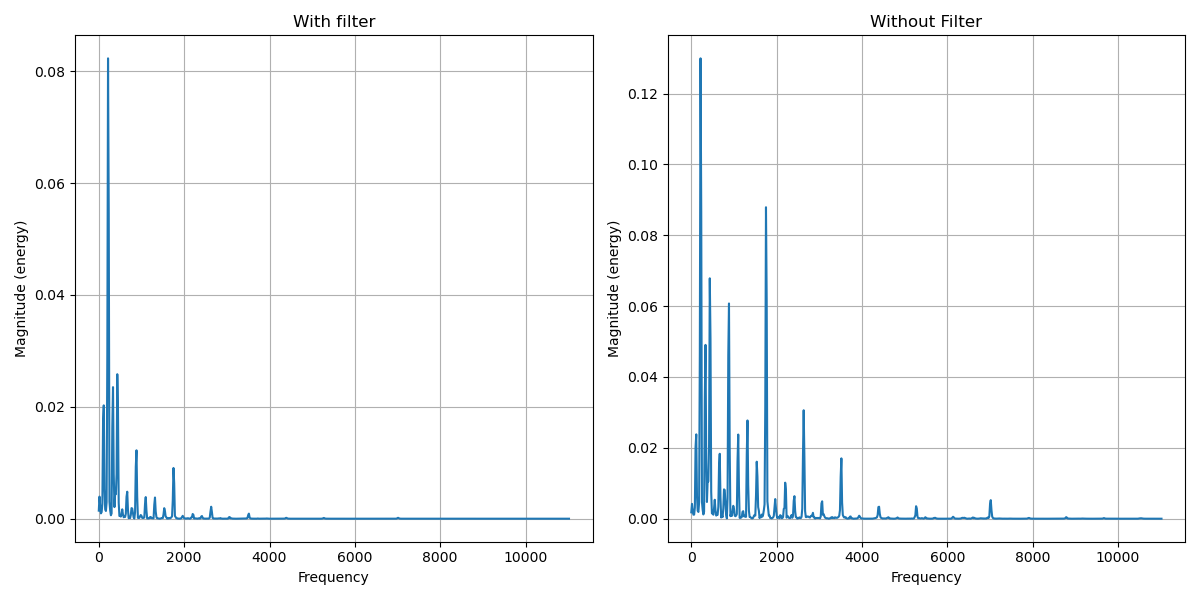

In [33]:
import matplotlib.pyplot as plt
%matplotlib ipympl

t0 = int(12.27*fs)
t1 = int(12.33*fs)

intervalY = Y[t0:t1]
intervalX = xn[t0:t1]

plt.figure(figsize=(12,6)) # Create "blank" figue of specified size

plt.subplot(1,2,1)
plt.magnitude_spectrum(intervalY, Fs=fs)
plt.title("With filter")
plt.grid(True)
plt.tight_layout()

plt.subplot(1,2,2)
plt.magnitude_spectrum(intervalX, Fs=fs)
plt.title("Without Filter")
plt.grid(True)
plt.tight_layout()

plt.show()
# WRITE YOUR CODE HERE:

ANSWER THEORY QUESTIONS HERE:

In the timestamp at 12.27 to 12.33 the filter appears to dampen the magnitude of all the frequencies by some. However the high power frequencies that are clustered togheter seems to get less damped, while the outlying high power frequencies seems to get damped a lot more. This is because the filter stores the previous sample, and if the previous sample is high, then the current doesnt get as damped. However if the previous sample is low, and the current is high, then the current signal gets relativily more damped.

<br>
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
      <a class="navbar-brand" href="4_audio_analysis.ipynb" target="_self">&lt; Previous page: <i>Audio Analysis</i></a>
      </div>
  </div>
</nav>